# Clasificación de números con CNNs (Convolutional Neural Networks)

In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.12.1+cu102  Device: cuda


## Creación de los cargadores de datos.

In [2]:
batch_size = 30

transform = transforms.Compose([
                                 transforms.Resize(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,)),
                                ])

train_dataset = datasets.MNIST('/tmp/data', 
                               train=True, 
                               download=True, 
                               transform=transform)

validation_dataset = datasets.MNIST('/tmp/data', 
                                    train=False, 
                                    transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

100%|██████████| 9912422/9912422 [00:00<00:00, 16611307.74it/s]


Extracting /tmp/data/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 7098903.76it/s]

Extracting /tmp/data/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/data/MNIST/raw




  0%|          | 0/1648877 [00:00<?, ?it/s]

100%|██████████| 1648877/1648877 [00:00<00:00, 8198681.74it/s]


Extracting /tmp/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8546670.60it/s]

Extracting /tmp/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/data/MNIST/raw



In [3]:
batch_size = 30

transforms_aument = transforms.Compose([
                                 transforms.Resize(45),
                                 transforms.RandomCrop(32, padding = 4),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,)),
                                ])

train_dataset_aument = datasets.MNIST('/tmp/data', 
                               train=True, 
                               download=True, 
                               transform=transforms_aument)

validation_dataset_aument = datasets.MNIST('/tmp/data', 
                                    train=False, 
                                    transform=transforms_aument)

train_loader_aument  = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader_aument  = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

The train and test data are provided via data loaders that provide iterators over the datasets. The first element of training data (`X_train`) is a 4th-order tensor of size (`batch_size`, 3, 32, 32), i.e. it consists of a batch of images of size 3x32x32 pixels. `y_train` is a vector containing the correct classes ("0", "1", ..., "9") for each training icon.

In [4]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([30, 1, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([30]) type: torch.LongTensor


Mostramos los 10 primeros dígitos:

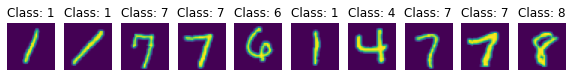

In [5]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i,:,:,:].numpy(), (1,2,0)))
    plt.title('Class: '+str(y_train[i].item()))

## Definición del modelo MLP.

El modelo se encuentra en: https://www.kaggle.com/code/blurredmachine/lenet-architecture-a-complete-guide/notebook



In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## anade tu modelo
        self.fc1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size= (5,5), stride=1)
        self.fc2 = nn.MaxPool2d(kernel_size= (2,2), stride=2)
        self.fc3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size= (5,5), stride=1)
        self.fc4 = nn.MaxPool2d(kernel_size= (2,2), stride=2)
        self.fc5 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size= (5,5), stride=1)
        self.fc6 = nn.Linear(120, 84)#Tercera capa. Entrada de 5 a 50
        self.fc7 = nn.Linear(84, 10) #Ultima capa. Entrada de 50 a 784 

        
    def forward(self, x):

        x = F.tanh(self.fc1(x))  #tanh en la primera capa
        x = F.tanh(self.fc2(x))  #tanh en la segunda capa
        x = F.tanh(self.fc3(x))  #tanh en la tercera capa
        x = F.tanh(self.fc4(x))  #tanh en la cuarta capa
        x = F.tanh(self.fc5(x))  #tanh en la quinta capa
        x = x.view(-1, 120)
        x = F.relu(self.fc6(x))  #relu en la sexta capa
        x = self.fc7(x) 
        
        
        return x


In [7]:
class NetDrop(nn.Module):
    def __init__(self):
        super(NetDrop, self).__init__()
        ## anade tu modelo
        self.fc1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size= (5,5), stride=1)
        self.fc2 = nn.MaxPool2d(kernel_size= (2,2), stride=2)
        self.fc3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size= (5,5), stride=1)
        self.fc4 = nn.MaxPool2d(kernel_size= (2,2), stride=2)
        self.fc5 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size= (5,5), stride=1)
        self.fc6 = nn.Linear(120, 84)#Tercera capa. Entrada de 5 a 50
        self.fc7 = nn.Linear(84, 10) #Ultima capa. Entrada de 50 a 784 

        
    def forward(self, x):

        x = F.tanh(self.fc1(x))  #tanh en la primera capa
        x = F.tanh(self.fc2(x))  #tanh en la segunda capa
        x = F.dropout2d(x, p=0.1)
        x = F.tanh(self.fc3(x))  #tanh en la tercera capa
        x = F.tanh(self.fc4(x))  #tanh en la cuarta capa
        x = F.tanh(self.fc5(x))  #tanh en la quinta capa
        x = x.view(-1, 120)
        x = F.dropout(x, p=0.25)
        x = F.relu(self.fc6(x))  #relu en la sexta capa
        x = self.fc7(x) 
        
        
        return x


## Creación del modelo, optimizador y función de pérdida.


In [8]:
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

model2 = Net().to(device)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)

print(model)
print(model2)

modelDrop = NetDrop().to(device)
optimizerDrop = torch.optim.Adam(modelDrop.parameters(), lr=1e-3)

modelDrop2 = NetDrop().to(device)
optimizerDrop2 = torch.optim.Adam(modelDrop2.parameters(), lr=1e-3)

print(modelDrop)
print(modelDrop2)

Net(
  (fc1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (fc2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc6): Linear(in_features=120, out_features=84, bias=True)
  (fc7): Linear(in_features=84, out_features=10, bias=True)
)
Net(
  (fc1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (fc2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc6): Linear(in_features=120, out_features=84, bias=True)
  (fc7): Linear(in_features=84, out_features=10, bias=True)
)
NetDrop(
  (fc1): Conv2d(1, 6, kernel_

## Learning

Definición del método de entrenamiento `train()` y del método de validación `validate()`. 

In [9]:
def train(epoch, model, train_loader, optimizer, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [10]:
def validate(model, validation_loader, loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))


# Bucle de entrenamiento

Por cada epoch, vamos a entrenar y después a validar el modelo

In [11]:
%%time
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch, model, train_loader, optimizer)
    validate(model,validation_loader, lossv, accv)

/home/alfith/.local/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300690
Train Epoch: 1 [6000/60000 (10%)]	Loss: 0.167596
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.129456
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.189678
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.070042
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.092441
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.035460
Train Epoch: 1 [42000/60000 (70%)]	Loss: 0.083154
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.007682
Train Epoch: 1 [54000/60000 (90%)]	Loss: 0.066911

Validation set: Average loss: 0.0675, Accuracy: 9785/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.088786
Train Epoch: 2 [6000/60000 (10%)]	Loss: 0.034597
Train Epoch: 2 [12000/60000 (20%)]	Loss: 0.121358
Train Epoch: 2 [18000/60000 (30%)]	Loss: 0.004611
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.038738
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.254923
Train Epoch: 2 [36000/60000 (60%)]	Loss: 0.030904
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.055507
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.07

In [12]:
%%time
epochs = 10

lossv1, accv1 = [], []
for epoch in range(1, epochs + 1):
    train(epoch, model2, train_loader_aument, optimizer2)
    validate(model2,validation_loader_aument, lossv1, accv1)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298009
Train Epoch: 1 [6000/60000 (10%)]	Loss: 0.297112
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.101713
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.179646
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.139097
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.023395
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.054506
Train Epoch: 1 [42000/60000 (70%)]	Loss: 0.014807
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.033509
Train Epoch: 1 [54000/60000 (90%)]	Loss: 0.004184

Validation set: Average loss: 0.0589, Accuracy: 9810/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.049969
Train Epoch: 2 [6000/60000 (10%)]	Loss: 0.182931
Train Epoch: 2 [12000/60000 (20%)]	Loss: 0.218482
Train Epoch: 2 [18000/60000 (30%)]	Loss: 0.146115
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.160488
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.026407
Train Epoch: 2 [36000/60000 (60%)]	Loss: 0.293486
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.057411
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.00

In [13]:
%%time
epochs = 10

lossv2, accv2 = [], []
for epoch in range(1, epochs + 1):
    train(epoch, modelDrop, train_loader, optimizerDrop)
    validate(modelDrop,validation_loader, lossv2, accv2)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.288190
Train Epoch: 1 [6000/60000 (10%)]	Loss: 0.362519
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.393479
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.238793
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.227986
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.288517
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.169439
Train Epoch: 1 [42000/60000 (70%)]	Loss: 0.222477
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.145292
Train Epoch: 1 [54000/60000 (90%)]	Loss: 0.012531

Validation set: Average loss: 0.0853, Accuracy: 9728/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.025770
Train Epoch: 2 [6000/60000 (10%)]	Loss: 0.105402
Train Epoch: 2 [12000/60000 (20%)]	Loss: 0.034868
Train Epoch: 2 [18000/60000 (30%)]	Loss: 0.148639
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.081606
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.094566
Train Epoch: 2 [36000/60000 (60%)]	Loss: 0.312209
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.183630
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.10

In [14]:
%%time
epochs = 10

lossv3, accv3 = [], []
for epoch in range(1, epochs + 1):
    train(epoch, modelDrop2, train_loader_aument, optimizerDrop2)
    validate(modelDrop2,validation_loader_aument, lossv3, accv3)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308346
Train Epoch: 1 [6000/60000 (10%)]	Loss: 0.679165
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.342911
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.373417
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.150054
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.080695
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.056590
Train Epoch: 1 [42000/60000 (70%)]	Loss: 0.274112
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.275378
Train Epoch: 1 [54000/60000 (90%)]	Loss: 0.158026

Validation set: Average loss: 0.0790, Accuracy: 9735/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.064883
Train Epoch: 2 [6000/60000 (10%)]	Loss: 0.076305
Train Epoch: 2 [12000/60000 (20%)]	Loss: 0.036396
Train Epoch: 2 [18000/60000 (30%)]	Loss: 0.098997
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.006758
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.058764
Train Epoch: 2 [36000/60000 (60%)]	Loss: 0.032539
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.017225
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.02

Visualización del proceso de entrenamiento

* *Loss* diferencia entre la salida del modelo y la real.  Hay que minimizarla hasta 0, para ello usamos el optimizador.
* *Accuracy* es la precisión del modelo.

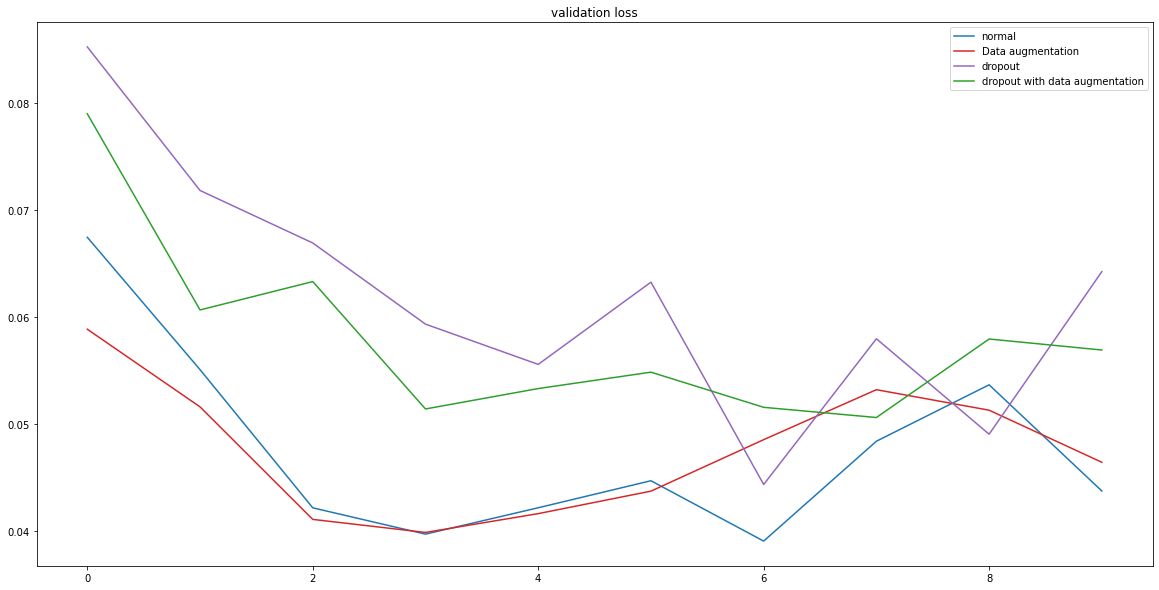

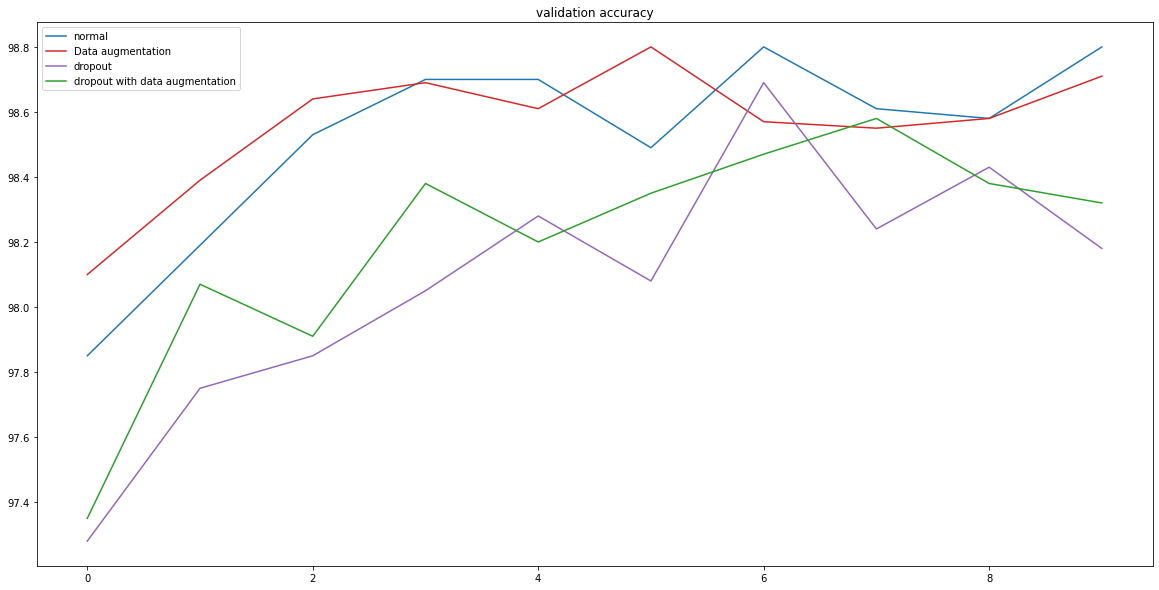

In [16]:
plt.figure(figsize=(20,10))
plt.plot(range(len(lossv)), lossv, "tab:blue")
plt.plot(range(len(lossv1)), lossv1, "tab:red")
plt.plot(range(len(lossv2)), lossv2, "tab:purple")
plt.plot(range(len(lossv3)), lossv3, "tab:green")
plt.title('validation loss')
plt.legend(["normal", "Data augmentation", "dropout", "dropout with data augmentation"])

plt.figure(figsize=(20,10))
plt.plot(range(len(accv)), accv, "tab:blue")
plt.plot(range(len(accv1)), accv1, "tab:red")
plt.plot(range(len(accv2)), accv2, "tab:purple")
plt.plot(range(len(accv3)), accv3, "tab:green")
plt.title('validation accuracy')
plt.legend(["normal", "Data augmentation", "dropout", "dropout with data augmentation"])

